In [8]:
from timeit import Timer

#for the testing dir
import sys
sys.path.append("..")

from pybhjet_3ml import BHJetModel
from threeML import Model
import matplotlib.pyplot as plt
import numpy as np
from threeML import use_astromodels_memoization
use_astromodels_memoization(True)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
#setting up the Pybind Model to be usable in threeml 
bhjet = BHJetModel()
x_values = np.logspace(-9, 5, 1000)

In [ ]:
#how bhjet model is evaluated in threeml, expects the x values and returns interp. flux 
calc_flux = bhjet(x_values)

In [11]:
#listing the free/avail parameters 
bhjet.free_parameters

OrderedDict([('Mbh',
              Parameter Mbh = 660000000.0 []
              (min_value = 100000.0, max_value = 1000000000.0, delta = 0.1, free = True)),
             ('jetrat',
              Parameter jetrat = 0.01 []
              (min_value = 1e-07, max_value = 1.0, delta = 0.1, free = True)),
             ('r_0',
              Parameter r_0 = 10.0 []
              (min_value = 2.0, max_value = 50.0, delta = 0.1, free = True)),
             ('z_diss',
              Parameter z_diss = 50.0 []
              (min_value = 30.0, max_value = 500.0, delta = 0.1, free = True)),
             ('z_acc',
              Parameter z_acc = 50.0 []
              (min_value = 30.0, max_value = 500.0, delta = 0.1, free = True)),
             ('t_e',
              Parameter t_e = 400.0 []
              (min_value = 50.0, max_value = 1200.0, delta = 0.1, free = True)),
             ('f_nth',
              Parameter f_nth = 0.1 []
              (min_value = 0.05, max_value = 0.9, delta = 0.1, free = T

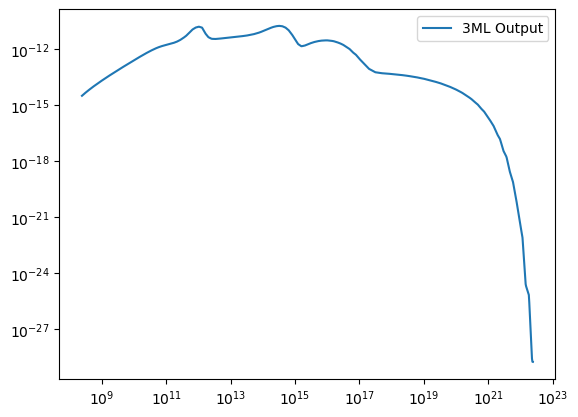

In [13]:
#ThreeML unit conversion: 
keV_to_erg = 1.60218e-9 
mjy = 1e-26

# Convert energy (keV) to frequency (Hz)
frequency_hz = x_values / (4.135667696e-18) # for keV back to hz 

# differential photon flux to flux density 
original_flux = (calc_flux * (x_values * keV_to_erg)) # erg/s/cm^2/Hz

plt.loglog(frequency_hz, original_flux*frequency_hz, label="3ML Output")
plt.legend()
plt.show()